In [70]:
import pandas as pd
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime
# import quandl
import matplotlib.pylab as plt

from statsmodels.tsa.stattools import coint, adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,LSTM
# import tensorflow.keras
# import tensorflow
# mlflow.tensorflow.autolog

# import mlflow
import sklearn.tree 
import sklearn
#import DecisionTreeRegressor

np.random.seed(0)
import time
start_time = time.time()

In [71]:
df_org = pd.read_csv('1 min range')

In [72]:
df_org.head()

,symbol,start_time,opening_price,closing_price,highest_price,lowest_price,transaction_amount,transaction_volume
0,NKN-USDT,2022-05-14 21:50:00,0.0919,0.0919,0.0919,0.0919,1.7357,0.1595
1,NKN-USDT,2022-05-14 21:49:00,0.0919,0.0919,0.0919,0.0919,0.0000,0.0000
2,NKN-USDT,2022-05-14 21:48:00,0.0919,0.0919,0.0919,0.0919,0.0000,0.0000
3,NKN-USDT,2022-05-14 21:47:00,0.0919,0.0919,0.0919,0.0919,0.0000,0.0000
4,NKN-USDT,2022-05-14 21:46:00,0.0919,0.0919,0.0919,0.0919,0.0000,0.0000


In [73]:
# pandas controls on how much data to see
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
df_org.symbol.unique()

array(['NKN-USDT', 'LOOM-BTC', 'JUP-ETH', ..., 'GMB-BTC', 'TRIBE-USDT',
       'USDT-UST'], dtype=object)

In [74]:
df_org['start_time'].min()

'2022-05-13 08:52:00'

In [75]:
df_org['start_time'].max()

'2022-05-14 21:58:00'

In [76]:
df = df_org[df_org['symbol'] == "BTC-USDT"]

In [77]:
df.head()

,symbol,start_time,opening_price,closing_price,highest_price,lowest_price,transaction_amount,transaction_volume
282000,BTC-USDT,2022-05-14 21:52:00,29958.3000,29973.9000,29973.9000,29958.3000,1.3059,39134.3855
282001,BTC-USDT,2022-05-14 21:51:00,29939.0000,29958.3000,29958.3000,29938.9000,2.8629,85723.5010
282002,BTC-USDT,2022-05-14 21:50:00,29934.7000,29938.9000,29943.7000,29934.7000,2.3678,70891.0983
282003,BTC-USDT,2022-05-14 21:49:00,29926.0000,29934.7000,29942.5000,29925.9000,1.7128,51276.3355
282004,BTC-USDT,2022-05-14 21:48:00,29954.7000,29925.9000,29954.8000,29912.2000,6.3755,190797.2242


In [78]:
df['start_time'].min()

'2022-05-13 20:53:00'

In [79]:
df['start_time'].max()

'2022-05-14 21:52:00'

LSTM 

In [80]:
#df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['opening_price'] = pd.to_numeric(df['opening_price'], errors='coerce')
df['start_time']=pd.to_datetime(df['start_time']) 
df['year'] = df['start_time'].apply(lambda x: x.year)
df['quarter'] = df['start_time'].apply(lambda x: x.quarter)
df['month'] = df['start_time'].apply(lambda x: x.month)
df['day'] = df['start_time'].apply(lambda x: x.day)
df=df.loc[:,['start_time','opening_price', 'year','quarter','month','day']]
df.sort_values('start_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["start_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.opening_price.min())
print('The time series ends on: ', df.opening_price.max())

Number of rows and columns after removing missing values: (1500, 7)
The time series starts from:  28672.4
The time series ends on:  30276.7


In [81]:
from scipy import stats
stat, p = stats.normaltest(df.opening_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=3.211, p=0.201
Data looks Gaussian (fail to reject H0)


In [82]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albu

Kurtosis of normal distribution: -0.17941730661788968
Skewness of normal distribution: -0.06409089873187727


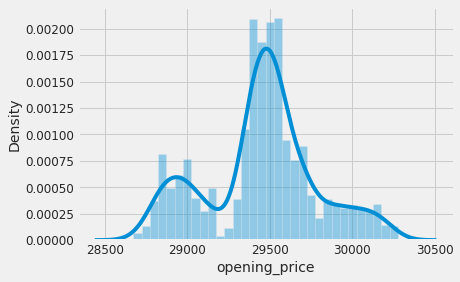

In [83]:
import seaborn as sns

sns.distplot(df.opening_price);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.opening_price)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.opening_price)))

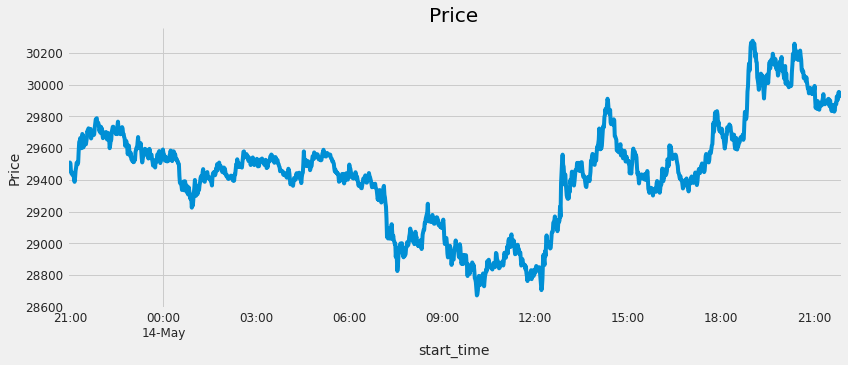

In [84]:
import matplotlib.pyplot as plt
df1=df.loc[:,['start_time','opening_price']]
df1.set_index('start_time',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Price')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Price')
sns.despine(top=True)
plt.show();

,count,mean,std,min,25%,50%,75%,max
opening_price,1500.0000,29448.8367,337.2196,28672.4000,29325.3500,29472.9500,29615.1000,30276.7000


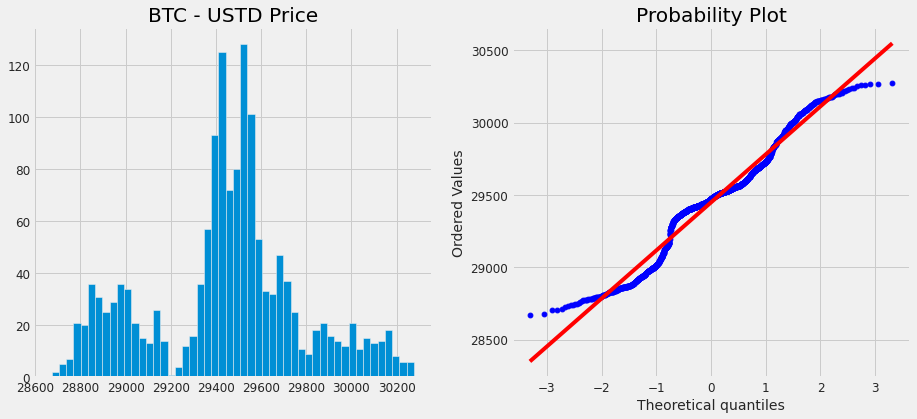

In [85]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['opening_price'].hist(bins=50)
plt.title('BTC - USTD Price')
plt.subplot(1,2,2)
stats.probplot(df['opening_price'], plot=plt);
df1.describe().T

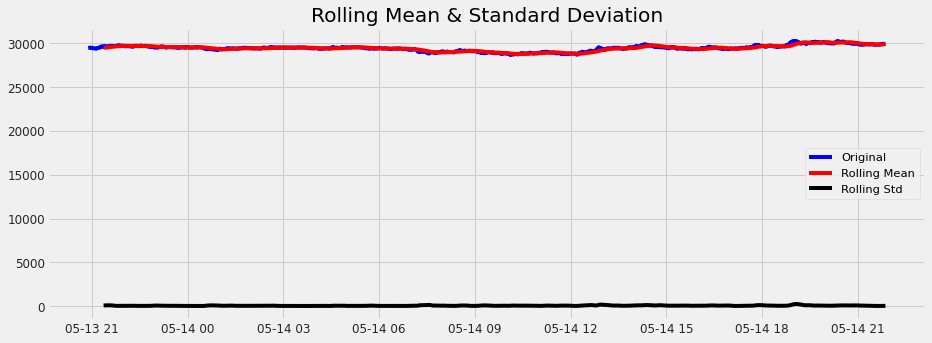

<Results of Dickey-Fuller Test>
Test Statistic                  -1.3033
p-value                          0.6277
#Lags Used                       2.0000
Number of Observations Used   1497.0000
Critical Value (1%)             -3.4347
Critical Value (5%)             -2.8635
Critical Value (10%)            -2.5678
dtype: float64


In [86]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df1.opening_price.dropna())

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

dataset = df.opening_price.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [88]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
17/17 [==============================] - 5s 76ms/step - loss: 0.0897 - val_loss: 0.0265
Epoch 2/20
17/17 [==============================] - 0s 14ms/step - loss: 0.0118 - val_loss: 0.0139
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0119
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0079
Epoch 5/20
17/17 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0102
Epoch 6/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0086
Epoch 7/20
17/17 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0085
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0075
Epoch 9/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0078
Epoch 10/20
17/17 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0068
Epoch 11/2

In [89]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 46.92997771635217
Train Root Mean Squared Error: 63.53823917871313
Test Mean Absolute Error: 67.89879424516947
Test Root Mean Squared Error: 96.95510615137717


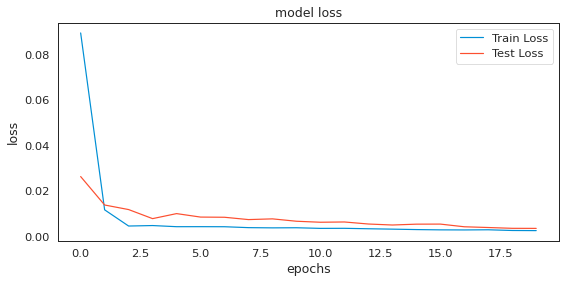

In [90]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

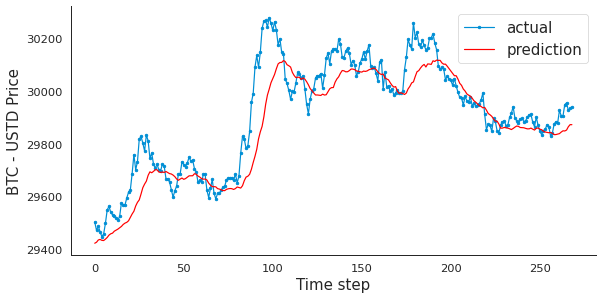

In [91]:
aa=[x for x in range(400)]
plt.figure(figsize=(8,4))
plt.plot(Y_test[0][:350], marker='.', label="actual")
plt.plot(test_predict[:,0][:350], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('BTC - USTD Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();